1. What are the definitions of precision and recall? Explain why there is a tradeoff between the two? You can use graphs or any other tools to answer this question.

Precision: Ratio of correctly predicted positive observations to the total. TP / (TP + FP). Measures how many of the items predicted as positive are actually positive. Focuses on minimizing false positives.
Recall: Ratio of correctly predicted positive observations to all actual positives. TP / (TP + FN). Measures how many of the actual positives were predicted as positive. Focuses on minimizing false negatives.
Tradeoff: Exists because improving one typically comes at the expense of the other. If we increase the classification threshold, we increase precision but decrease recall. If we decrease the threshold, we increase recall but decrease precision.
          This is because the model becomes more conservative with higher thresholds, leading to fewer false positives but more false negatives. Lower thresholds lead to more false positives but fewer false negatives.

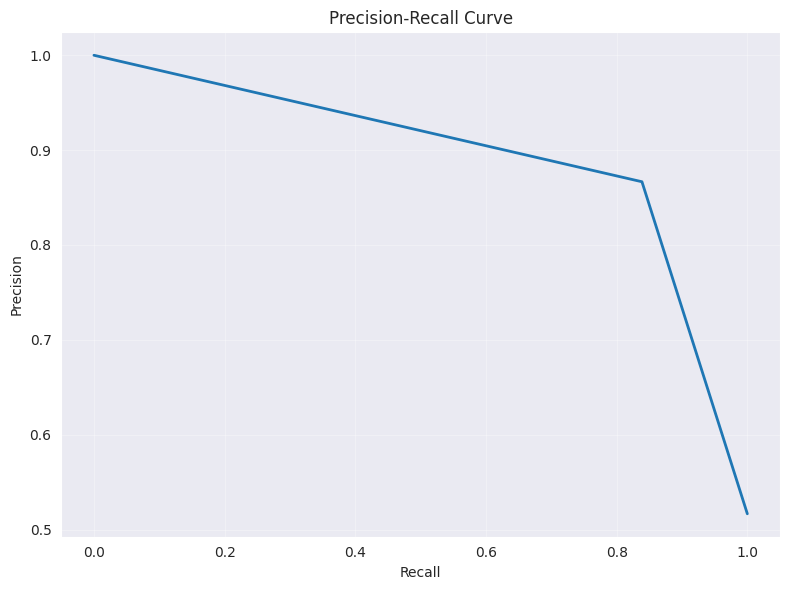

In [4]:
# Sources: https://stackoverflow.com/questions/60865028/sklearn-precision-recall-curve-and-threshold
#          https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
#          https://www.geeksforgeeks.org/precision-recall-curve-ml/
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Create the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

2. What is the definition of F1 score and how do you interpret a high F1 score?
F1 is a performance metric for classification models that models precision and recall into a single value by the harmonic mean. F1 = 2 * (precision * recall) / (precision + recall). It balances the tradeoff between precision and recall, providing a single score that summarizes the model's performance.
A high F1 score (closer to 1) indicates that the model has high precision and recall, meaning that it correctly identifies most of the positive samples while minimizing false positives.